In [5]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import eternabench as eb


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [7]:
df = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/S-Processed-TES_metadata_plus_scores.csv')

In [8]:
pkgs = [x.split(' ')[0] for x in df.keys() if x.endswith('F-score')]

id_vars = ['SSTRAND_ID', 'TYPE', 'EXT_SOURCE', 'EXT_ID', 'ORGANISM']
reshaped_df = pd.DataFrame()

for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    keys = list([x for x in df.keys() if x.endswith(metric)])
    tmp = df[id_vars+keys]
    tmp2 = tmp.melt(id_vars=id_vars)
    tmp2['package'] = [x.split(' ')[0] for x in tmp2['variable']]
    tmp2[metric] = tmp2['value']
    tmp2 = tmp2.drop(columns=['variable','value'])
    if i==0:
        reshaped_df = tmp2
    else:
        reshaped_df = pd.concat([reshaped_df,tmp2[[metric]]],axis=1)

reshaped_df['bs_ind'] = [x for x in range(974)]*9

# Secondary structure data

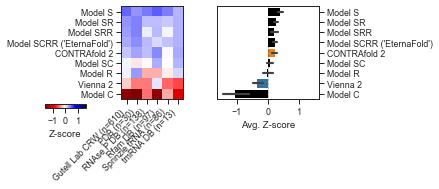

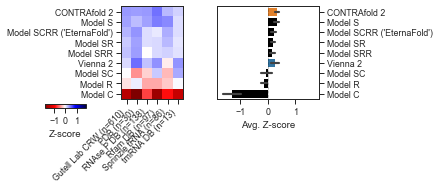

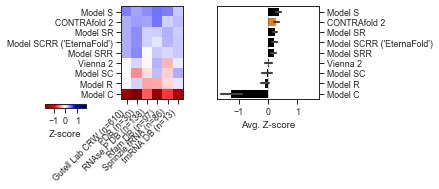

In [14]:
dataset_labels=['Gutell Lab CRW (n=610)', 'PDB (n=30)', 'RNAse P DB (n=138)', 'Rfam DB (n=97)', 'Sprinzle tRNA (n=86)', 'tmRNA DB (n=13)']

for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    zscores, _ = eb.stats.calculate_Z_scores(reshaped_df,dataset_field='EXT_SOURCE', metric=metric)
    
    eb.plot.ranked_heatmap(zscores, dataset_field='EXT_SOURCE',metric=metric+'_zscore_by_EXT_SOURCE_mean',dataset_labels=dataset_labels)
    #savefig('FIGURES/3/STRAND_TES_heamap_%s.pdf' % metric,bbox_inches='tight')

zscores.to_csv('../scoring_data/STRAND_Fscore_by_dataset.csv',index=False)

# Chemical Mapping data

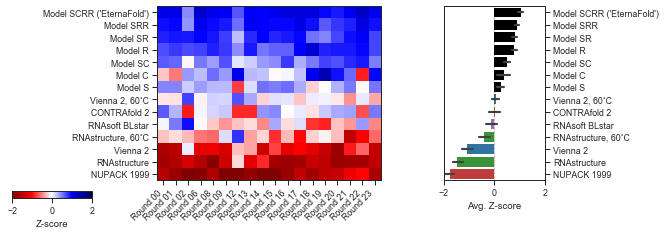

In [17]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EB_+efold_test_pearson_zscores_by_Dataset.csv')
eb.plot.ranked_heatmap(zscores, vmin=-2,vmax=2)

#savefig('FIGURES/3/Figure_3_cm.pdf',bbox_inches='tight')

# Riboswitch data

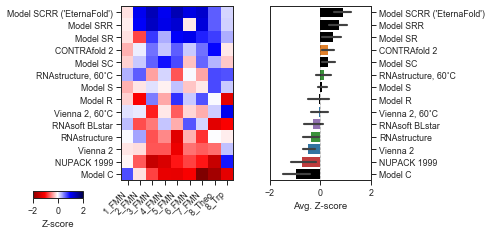

In [15]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_pearson_zscores_Fig3_efold_testset.csv')
eb.plot.ranked_heatmap(zscores, vmin=-2, vmax=2)
#savefig('FIGURES/3/Figure_3D.pdf',bbox_inches='tight')